# Dog vs Cat Convolution Neural Network Classifier

### Problem statement :

In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying dog and cat images.
#### Note:This problem statement and dataset is taken from [this](https://www.kaggle.com/c/dogs-vs-cats) Kaggle competition.

### Dependencies
* Jupyter notebook
* Tensorflow
* Python 3.7
* Matplotlib
* Seaborn
* Scikit-Learn
* Pandas
* Numpy


#### Test Train Split
Image training set contain 12500 images for each category. I split those into 80% train and 20% means test Split each class images into 10,000 for train and 2,500 for test. 


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from PIL import Image
#from time import time

In [2]:
#%reload_ext tensorboard

#import tensorflow as tf
#import datetime,os

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

Network Parameter:
* Rectifier Linear Unit 
* Adam optimizer
* Sigmoid on Final output
* Binary CrossEntropy loss

In [4]:
import tensorflow as tf
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

## Data Augmentation
Using some Data Augmentation techniques for more data and Better results.
* Shearing of images
* Random zoom
* Horizontal flips

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('F:\\Data\\train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('F:\\Data\\test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('F:\\Data\\test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)


Found 19999 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
%%capture

#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


classifier.fit_generator(train_set,
                        steps_per_epoch=625, 
                        epochs = 10,
                        validation_data = test_set,
                        validation_steps = 155, 
                        #callbacks=[tensorboard_callback]
                        );

classifier.save('resources/Aniket_Cat_Dog.h5')

In [ ]:
#%tensorboard --logdir logs

In [6]:
from tensorflow.keras.models import load_model
classifier = load_model(r'C:\Users\hp\Aniket_Cat_Dog.h5')

### Prediction of a Single Image

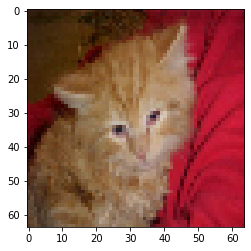

In [8]:
#Prediction of image
%matplotlib inline

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img(r'F:\Data\test\Cat\11029.jpg', grayscale=False, color_mode='rgb',target_size=(64, 64),interpolation='nearest')
plt.imshow(img1)
plt.show()

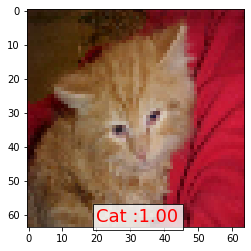

In [9]:
img = image.img_to_array(img1)
img = img/255

img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [10]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.tail(10)

,filename,predict,y,y_pred
4988,Dog\12490.jpg,1.00000,1,1
4989,Dog\12491.jpg,0.99991,1,1
4990,Dog\12492.jpg,0.99827,1,1
4991,Dog\12493.jpg,1.00000,1,1
4992,Dog\12494.jpg,0.99999,1,1
4993,Dog\12495.jpg,0.99837,1,1
4994,Dog\12496.jpg,1.00000,1,1
4995,Dog\12497.jpg,0.99989,1,1
4996,Dog\12498.jpg,1.00000,1,1
4997,Dog\12499.jpg,1.00000,1,1


### Misclassified Images

In [12]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 37


### Confusion Matrix

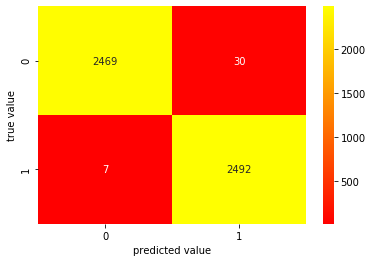

In [17]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="autumn",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

### Few of Cat images misclassified as Dogs.

30


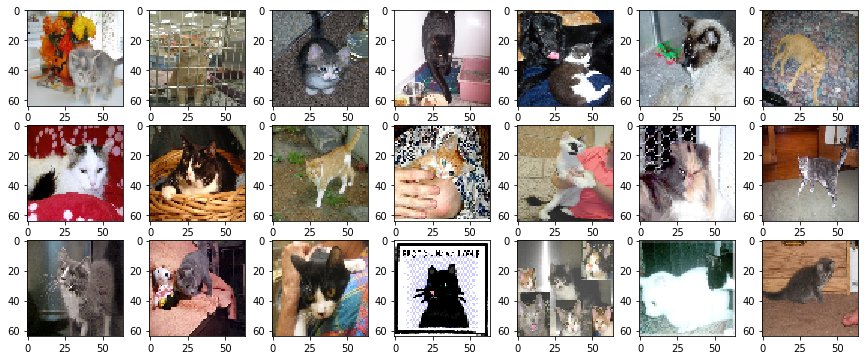

In [13]:

import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
print(CatasDog.count())

for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('F:\\Data\\test\\'+CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    
plt.show()


In [15]:
df['filename']

0       Cat\10000.jpg
1       Cat\10001.jpg
2       Cat\10002.jpg
3       Cat\10003.jpg
4       Cat\10004.jpg
            ...      
4993    Dog\12495.jpg
4994    Dog\12496.jpg
4995    Dog\12497.jpg
4996    Dog\12498.jpg
4997    Dog\12499.jpg
Name: filename, Length: 4998, dtype: object

### Few of Dog images misclassified as Cats.

7


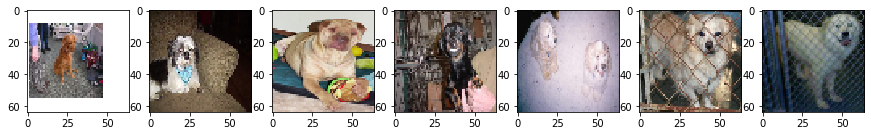

In [18]:

import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing import image

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 1
print(DogasCat.count())

for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img(r'F:\\Data\\test\\'+DogasCat.iloc[i],grayscale=False,color_mode='rgb', target_size=(64,64), interpolation='nearest')
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show(fig)

### Model Summary and Visualisation

In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

### Visualization of Layers Ouptut


array([[[[0.61960787, 0.65882355, 0.6627451 ],
         [0.6039216 , 0.6392157 , 0.63529414],
         [0.28235295, 0.34901962, 0.3254902 ],
         ...,
         [0.70980394, 0.74509805, 0.7411765 ],
         [0.6745098 , 0.7490196 , 0.7411765 ],
         [0.48235294, 0.5137255 , 0.5254902 ]],

        [[0.5882353 , 0.6431373 , 0.6431373 ],
         [0.5882353 , 0.63529414, 0.627451  ],
         [0.19607843, 0.2784314 , 0.2509804 ],
         ...,
         [0.69411767, 0.73333335, 0.7294118 ],
         [0.7058824 , 0.7529412 , 0.7529412 ],
         [0.39607844, 0.4392157 , 0.44705883]],

        [[0.61960787, 0.6666667 , 0.6666667 ],
         [0.6392157 , 0.6784314 , 0.6745098 ],
         [0.10588235, 0.18039216, 0.15686275],
         ...,
         [0.7254902 , 0.7647059 , 0.7607843 ],
         [0.70980394, 0.7411765 , 0.7490196 ],
         [0.25490198, 0.3254902 , 0.3254902 ]],

        ...,

        [[0.95686275, 0.49019608, 0.64705884],
         [0.92941177, 0.25882354, 0.5176471 ]

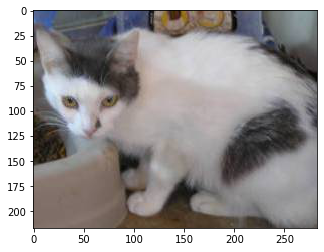

In [20]:
#Input Image for Layer visualization
img1 = image.load_img(r"F:\Data1\test\Cat\cat.4205.jpg")
plt.imshow(img1);
#preprocess image
img1 = image.load_img(r'F:\Data\test\Cat\12205.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)
img

In [21]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'flatten_3', 'dense_6', 'dense_7']


In [22]:
from tensorflow.keras.models import Model
conv2d_6_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_6').output)
conv2d_7_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_7').output)

In [25]:
conv2d_6_features = conv2d_6_output.predict(img)
conv2d_7_features = conv2d_7_output.predict(img)
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('First conv layer feature output shape : ',conv2d_7_features.shape)

First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


### Single Convolution Filter Output

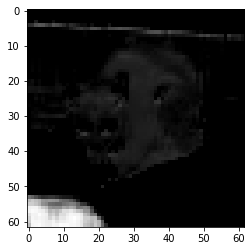

In [26]:
plt.imshow(conv2d_6_features[0, :, :, 4], cmap='gray')

### First Covolution Layer Output

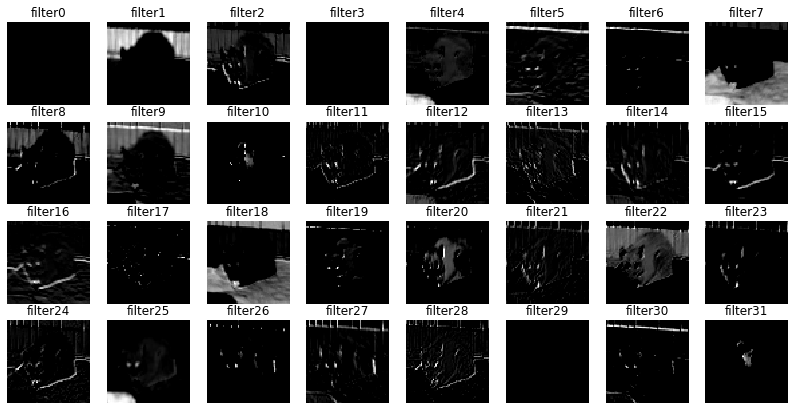

In [28]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[0, :, :, i], cmap='gray')
plt.show()

### Second Covolution Layer Output

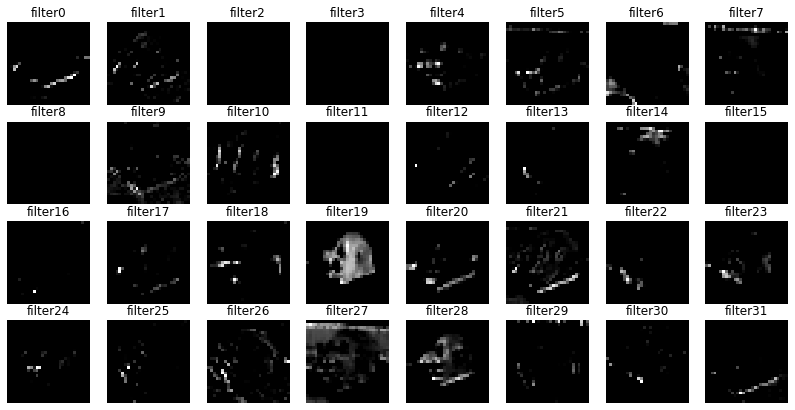

In [29]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_7_features[0, :, :, i], cmap='gray')
plt.show()

### Model Performance on Unseen Data

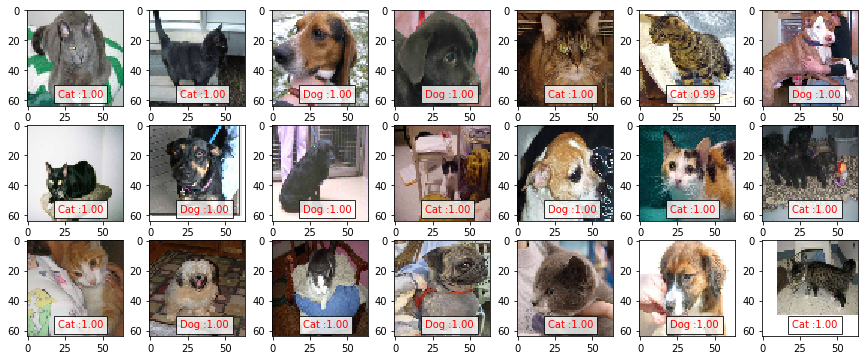

In [30]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img(r'F:\Data\test1\\'+test_set1.filenames[np.random.choice(range(2023))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)


### Model Evaluation

In [ ]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

In [22]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 99.59%     Training loss  : 0.018133
Validation Accuracy: 99.26%     Validation loss: 0.018665


### Conclusion
The Architecture and parameter used in this network are capable of producing accuracy of **99.26%** on Validation Data which is good enough. 